In [1]:
import pandas as pd
import numpy as np
import glob
import re
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import sparse #cut down on memory size
from sklearn.metrics.pairwise import pairwise_distances 

In [2]:
# df = pd.concat(map(pd.read_csv, glob.glob('book_description_dataset/*.csv')))
df_description = pd.read_csv('../datasets/book_description_dataset/combined_desc.csv')
df_title = pd.read_csv('../datasets/book_description_dataset/title.csv')

In [3]:
# book id's from 1 - 2999
df = pd.merge(df_title, df_description, on = 'book_id')
df.head()

,Unnamed: 0_x,book_id,book_name,Unnamed: 0_y,description
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,0,\nWhen Harry Potter and the Half-Blood Prince ...
1,1,2,Harry Potter and the Order of the Phoenix (Har...,1,\nThere is a door at the end of a silent corri...
2,2,3,Harry Potter and the Sorcerer's Stone (Harry P...,2,\nHarry Potter's life is miserable. His parent...
3,3,4,Harry Potter and the Chamber of Secrets (Harry...,3,\nThe Dursleys were so mean and hideous that s...
4,4,5,Harry Potter and the Prisoner of Azkaban (Harr...,4,\nHarry Potter's third year at Hogwarts is ful...


In [48]:
df.shape

(2616, 5)

In [49]:
# dropped unnamed column
df.drop(columns = ['Unnamed: 0_y','Unnamed: 0_x'], inplace = True)


In [50]:
# setting the index to book_name for calculations in the later part of the jupyter notebook
df.set_index('book_name', inplace=True)

In [51]:
df.head(20)

,book_id,description
book_name,,
"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",1,\nWhen Harry Potter and the Half-Blood Prince ...
"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",2,\nThere is a door at the end of a silent corri...
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",3,\nHarry Potter's life is miserable. His parent...
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",4,\nThe Dursleys were so mean and hideous that s...
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",5,\nHarry Potter's third year at Hogwarts is ful...
"Harry Potter and the Goblet of Fire (Harry Potter, #4)",6,\nHarry Potter is midway through his training ...
"The Harry Potter Collection (Harry Potter, #1-6)",7,"\nSix years of magic, adventure, and mystery m..."
"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",8,\nBox Set containing Harry Potter and the Sorc...
"Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis and Speculation",9,\nThrough the magic of print-on-demand technol...


In [14]:
# removed speacial characters
# removed punctutions
# all lowercase
df = df.replace('\n',' ', regex=True)
df["description"] = df['description'].str.replace('[^\w\s]',' ')
df['description'] = df['description'].str.lower()

In [15]:
df.head()

,book_id,description
book_name,,
"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",1,when harry potter and the half blood prince o...
"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",2,there is a door at the end of a silent corrid...
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",3,harry potter s life is miserable his parents...
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",4,the dursleys were so mean and hideous that su...
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",5,harry potter s third year at hogwarts is full...


In [16]:
cvec = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, max_df = 0.95, min_df = 3, binary = True)
matrix = cvec.fit_transform(df['description'])
df_matrix = pd.DataFrame(matrix.todense(), columns = cvec.get_feature_names())

In [17]:
df_matrix

,000,10,100,1000,101,11,11th,12,120,125,...,zonas,zone,zoo,zu,zukunft,zum,zur,él,últimos,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_matrix['description'].value_counts(normalize = True)

0    0.991208
1    0.008792
Name: description, dtype: float64

In [19]:
# Let's use dictionary comprehension to create a dictionary of summed words
freq_dict = {word: df_matrix[word].sum() for word in cvec.get_feature_names()}

In [20]:
# Create a dataframe with index = 'counts'
freq_df = pd.DataFrame(freq_dict, index = ['counts'])
# Transpose the dataframe
freq_df = freq_df.T
# Look at the head of the dataframe
freq_df.head()

,counts
000,72
10,27
100,46
1000,6
101,5


In [21]:
# Calculating the feaquency of the words and counting them 
freq_df.sort_values(by = 'counts', ascending = False)

,counts
book,822
new,696
life,608
world,587
work,465
...,...
cracking,3
cowboy,3
punctuation,3
punished,3


In [31]:
# Get a list of the top 15 words occuring in the dataframe
top_15_words = list(freq_df.sort_values(by = 'counts', ascending = False).head(15).index)
top_15_words

['book',
 'new',
 'life',
 'world',
 'work',
 'time',
 'story',
 'author',
 'years',
 'history',
 'readers',
 'great',
 'novel',
 'man',
 'written']

In [32]:
#removed numbers and foreign language using regular expression
english_columns = []
non_english_columns = []
for word in list(df_matrix.columns):
    if re.sub("[^a-zA-Z]", " ", word) == word:
        english_columns.append(word)
    else:
        non_english_columns.append(word)

In [33]:
# created a clean dataframe 
df_clean = df_matrix[english_columns]
df_clean

,aaron,aarons,abandon,abandoned,abandonment,abandons,abbey,abducted,aber,abiding,...,zeroing,zeus,zinn,zonas,zone,zoo,zu,zukunft,zum,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2612,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


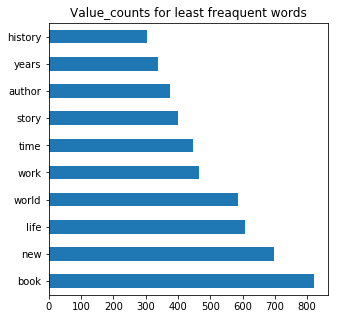

In [34]:
# checking the most freaquent words visually 
df_clean.sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize= (5,5))
plt.title('Value_counts for least freaquent words');

### Building a Content based Recommender
- Creating a sparse matrix since the description table is already count vectorized we do need to create a pivot table

In [35]:
pivot_sparse = sparse.csr_matrix(df_clean.fillna(0))

In [36]:
# Calculating the pairwise distances- the output is an array
recommender = pairwise_distances(pivot_sparse, metric='cosine')
recommender

array([[0.        , 0.8188679 , 0.83381948, ..., 0.98442058, 0.91060455,
        0.97366597],
       [0.8188679 , 0.        , 0.91695452, ..., 1.        , 0.98917003,
        0.96490688],
       [0.83381948, 0.91695452, 0.        , ..., 0.93333333, 0.9043659 ,
        0.94365638],
       ...,
       [0.98442058, 1.        , 0.93333333, ..., 0.        , 0.93479493,
        0.95774229],
       [0.91060455, 0.98917003, 0.9043659 , ..., 0.93479493, 0.        ,
        0.86773999],
       [0.97366597, 0.96490688, 0.94365638, ..., 0.95774229, 0.86773999,
        0.        ]])

In [37]:
# Converted an array of pairwise distances into a dataframe
recommender_df = pd.DataFrame(recommender, index = df.index, columns = df.index)
recommender_df

book_name,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)","Harry Potter and the Order of the Phoenix (Harry Potter, #5)","Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","Harry Potter and the Chamber of Secrets (Harry Potter, #2)","Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)","Harry Potter and the Goblet of Fire (Harry Potter, #4)","The Harry Potter Collection (Harry Potter, #1-6)","Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)","Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis and Speculation","Harry Potter Collection (Harry Potter, #1-6)",...,Rose in Bloom,Louisa May Alcott: A Biography: With an Introduction to the New Edition,Louisa May Alcott (Biography (a & E)),"Louisa May Alcott: Her Life, Letters and Journals",The Journals of Louisa May Alcott,"Louisa May Alcott and ""Little Women"": Biography, Critique, Publications, Poems, Songs, and Contemporary Relevance",The Secret Garden,My Secret Garden: Women's Sexual Fantasies,The Secret Garden,The Secret Garden
book_name,,,,,,,,,,,,,,,,,,,,,
"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",0.000000,0.818868,0.833819,0.830337,0.841765,0.850104,0.863164,0.910874,0.889621,0.867804,...,0.982582,0.911515,0.978993,0.964606,0.953870,0.967156,0.929338,0.984421,0.910605,0.973666
"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",0.818868,0.000000,0.916955,0.930432,0.819257,0.889026,0.939217,0.960410,0.981613,0.941278,...,1.000000,1.000000,0.972005,0.976417,0.953895,1.000000,0.984306,1.000000,0.989170,0.964907
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",0.833819,0.916955,0.000000,0.832458,0.721901,0.857461,0.853615,0.936436,0.940959,0.874292,...,0.981366,0.962136,0.977527,0.962136,0.925977,0.982432,0.911808,0.933333,0.904366,0.943656
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",0.830337,0.930432,0.832458,0.000000,0.908839,0.865668,0.754744,0.880192,0.925811,0.743315,...,0.976585,1.000000,1.000000,1.000000,0.937990,1.000000,0.952506,0.979057,0.989075,0.964600
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",0.841765,0.819257,0.721901,0.908839,0.000000,0.864276,0.911501,0.930829,0.935751,0.914502,...,0.979722,0.938194,0.975544,0.958796,0.932872,0.980882,0.917739,0.981863,0.943234,0.969343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Louisa May Alcott and ""Little Women"": Biography, Critique, Publications, Poems, Songs, and Contemporary Relevance",0.967156,1.000000,0.982432,1.000000,0.980882,1.000000,0.974283,0.949748,0.953324,0.950310,...,0.970537,0.880263,0.928933,0.970066,0.863452,0.000000,0.880477,0.973648,0.917521,1.000000
The Secret Garden,0.929338,0.984306,0.911808,0.952506,0.917739,0.979797,0.963114,1.000000,0.949790,0.964365,...,0.936613,0.957066,0.974518,0.914132,0.888087,0.880477,0.000000,0.905509,0.812696,0.808337
My Secret Garden: Women's Sexual Fantasies,0.984421,1.000000,0.933333,0.979057,0.981863,1.000000,0.975602,1.000000,0.933579,0.976430,...,0.944098,0.971602,1.000000,0.943204,0.981494,0.973648,0.905509,0.000000,0.934795,0.957742


In [38]:
#df.loc[df.index['book_name'].str.contains('Soul')] - MASK TO FILTER 
df.loc[df.index.str.contains('Harry')]

,book_id,description
book_name,,
"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",1,when harry potter and the half blood prince o...
"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",2,there is a door at the end of a silent corrid...
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",3,harry potter s life is miserable his parents...
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",4,the dursleys were so mean and hideous that su...
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",5,harry potter s third year at hogwarts is full...
"Harry Potter and the Goblet of Fire (Harry Potter, #4)",6,harry potter is midway through his training a...
"The Harry Potter Collection (Harry Potter, #1-6)",7,six years of magic adventure and mystery ma...
"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",8,box set containing harry potter and the sorce...
"Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis and Speculation",9,through the magic of print on demand technolo...


In [39]:
# shows duplicate values 
recommender_df[["Harry Potter and the Half-Blood Prince (Harry Potter, #6)"]]

book_name,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)","Harry Potter and the Half-Blood Prince (Harry Potter, #6)"
book_name,,
"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",0.000000,0.842221
"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",0.818868,0.873845
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",0.833819,0.831210
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",0.830337,0.787905
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",0.841765,0.871424
...,...,...
"Louisa May Alcott and ""Little Women"": Biography, Critique, Publications, Poems, Songs, and Contemporary Relevance",0.967156,1.000000
The Secret Garden,0.929338,0.961722
My Secret Garden: Women's Sexual Fantasies,0.984421,1.000000


In [40]:
# dropping duplicate column names
recommender_df = recommender_df.loc[:, ~recommender_df.columns.duplicated()]

In [41]:
# dropping duplicate indices
recommender_df = recommender_df.loc[~recommender_df.index.duplicated(keep='first')]

In [42]:
#confirming the index equals column names
list(recommender_df.index) == list(recommender_df.columns)

True

In [43]:
# Output of a content based recommender
recommender_df[["Harry Potter and the Half-Blood Prince (Harry Potter, #6)"]]

book_name,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)"
book_name,
"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",0.000000
"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",0.818868
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",0.833819
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",0.830337
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",0.841765
...,...
"Louisa May Alcott: Her Life, Letters and Journals",0.964606
The Journals of Louisa May Alcott,0.953870
"Louisa May Alcott and ""Little Women"": Biography, Critique, Publications, Poems, Songs, and Contemporary Relevance",0.967156
